In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2847034743808391987
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15408536945506488921
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar100
from keras.utils import to_categorical

# Load CIFAR100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

print(train_labels.shape, test_labels.shape)



(50000, 100) (10000, 100)


In [3]:
# AlexNet model architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(100))  # Changed to 100 for CIFAR-100
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [4]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# model.fit(train_images, train_labels, epochs=90, 
#           validation_data=(test_images, test_labels))

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels))

Epoch 1/90
1563/1563 [==============================] - 16s 8ms/step - loss: 4.4587 - accuracy: 0.0416 - val_loss: 3.9539 - val_accuracy: 0.1170
Epoch 2/90
1563/1563 [==============================] - 13s 8ms/step - loss: 4.0421 - accuracy: 0.0799 - val_loss: 3.7617 - val_accuracy: 0.1531
Epoch 3/90
1563/1563 [==============================] - 12s 8ms/step - loss: 3.8716 - accuracy: 0.1072 - val_loss: 3.5926 - val_accuracy: 0.1820
Epoch 4/90
1563/1563 [==============================] - 12s 8ms/step - loss: 3.7574 - accuracy: 0.1305 - val_loss: 3.5159 - val_accuracy: 0.2002
Epoch 5/90
1563/1563 [==============================] - 12s 8ms/step - loss: 3.6624 - accuracy: 0.1470 - val_loss: 3.4188 - val_accuracy: 0.2191
Epoch 6/90
1563/1563 [==============================] - 12s 8ms/step - loss: 3.5835 - accuracy: 0.1606 - val_loss: 3.3527 - val_accuracy: 0.2276
Epoch 7/90
1563/1563 [==============================] - 12s 8ms/step - loss: 3.5133 - accuracy: 0.1759 - val_loss: 3.3591 - val_ac

1563/1563 [==============================] - 14s 9ms/step - loss: 1.1317 - accuracy: 0.7420 - val_loss: 2.9736 - val_accuracy: 0.3443
Epoch 58/90
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0852 - accuracy: 0.7550 - val_loss: 3.0023 - val_accuracy: 0.3388
Epoch 59/90
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0532 - accuracy: 0.7649 - val_loss: 3.1024 - val_accuracy: 0.3241
Epoch 60/90
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0150 - accuracy: 0.7751 - val_loss: 3.0166 - val_accuracy: 0.3450
Epoch 61/90
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9831 - accuracy: 0.7860 - val_loss: 3.0312 - val_accuracy: 0.3451
Epoch 62/90
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9505 - accuracy: 0.7943 - val_loss: 3.0584 - val_accuracy: 0.3431
Epoch 63/90
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9185 - accuracy: 0.8059 - val_loss: 3.0489 - val_accurac

In [5]:
#cifar100, 원본, 대조군

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


313/313 [==============================] - 1s 3ms/step - loss: 3.4800 - accuracy: 0.3350
Test loss: 3.479952812194824
Test accuracy: 0.33500000834465027


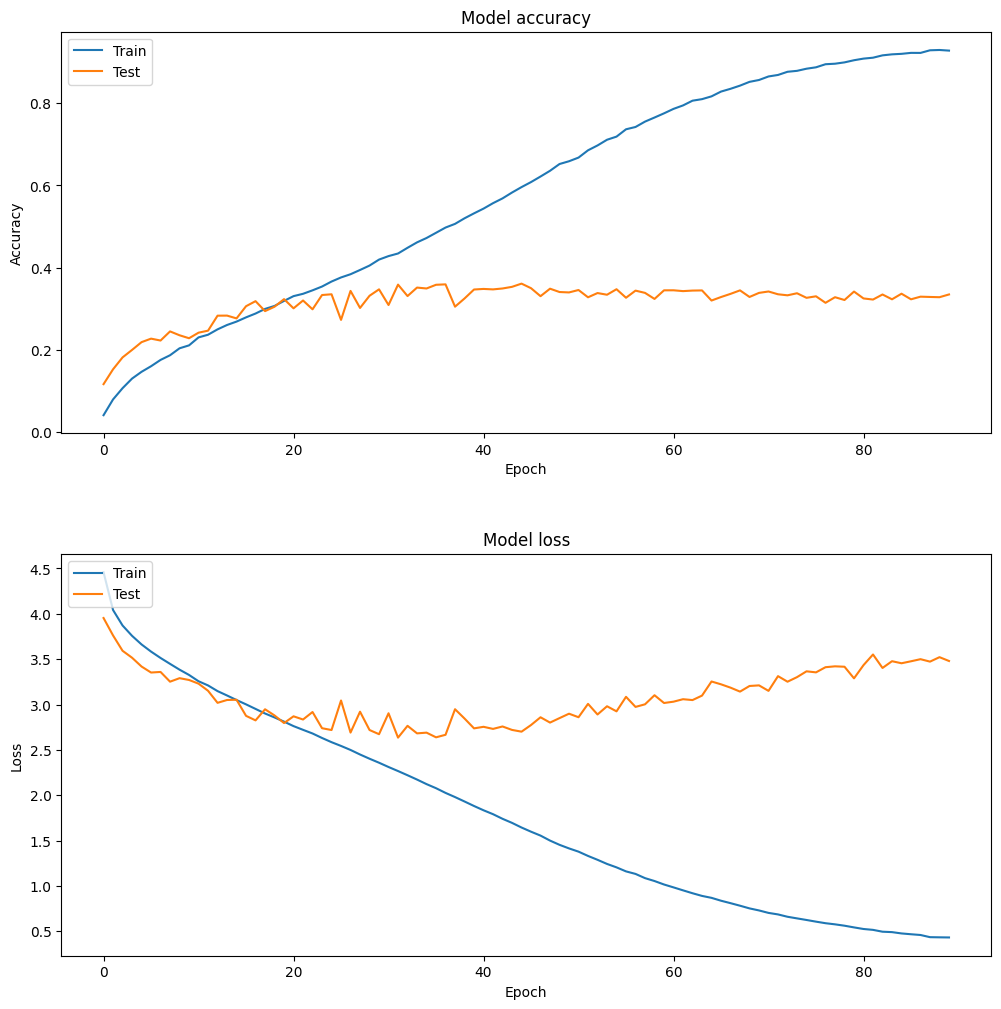

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()
